In [52]:
import sys, os
sys.path.append("../")
import nltk, pylab
nltk.download('stopwords')
import numpy, random
from preprocesing import *
from stats import *
import collections as c
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gcaracas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
%matplotlib inline

In [22]:
def zipf_law_plot(text='', title=''):
    dic_data=c.Counter(text)
    fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
    #fig, ax = plt.subplots()
    ax.plot(
        range(1, len(dic_data.keys()) + 1),
        sorted(list(dic_data.values()), reverse=True),
        '-b'
    )     
    ax.set(xlabel='Word Rank', ylabel='Frequency',
    title=title)
    ax.legend()
    #ax.set_ylim([0,1])
    #ax.xaxis.set_ticks(np.arange(0, 20, 1))
    ax.grid(True, zorder=5)
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    fig.savefig("onlyWacWord.png")

In [23]:
path = '../data/'

files = []
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r, file))

In [76]:
files

['../data/20_newsgroups/alt.atheism/49960',
 '../data/20_newsgroups/alt.atheism/51060',
 '../data/20_newsgroups/alt.atheism/51119',
 '../data/20_newsgroups/alt.atheism/51120',
 '../data/20_newsgroups/alt.atheism/51121',
 '../data/20_newsgroups/alt.atheism/51122',
 '../data/20_newsgroups/alt.atheism/51123',
 '../data/20_newsgroups/alt.atheism/51124',
 '../data/20_newsgroups/alt.atheism/51125',
 '../data/20_newsgroups/alt.atheism/51126',
 '../data/20_newsgroups/alt.atheism/51127',
 '../data/20_newsgroups/alt.atheism/51128',
 '../data/20_newsgroups/alt.atheism/51129',
 '../data/20_newsgroups/alt.atheism/51130',
 '../data/20_newsgroups/alt.atheism/51131',
 '../data/20_newsgroups/alt.atheism/51132',
 '../data/20_newsgroups/alt.atheism/51133',
 '../data/20_newsgroups/alt.atheism/51134',
 '../data/20_newsgroups/alt.atheism/51135',
 '../data/20_newsgroups/alt.atheism/51136',
 '../data/20_newsgroups/alt.atheism/51137',
 '../data/20_newsgroups/alt.atheism/51138',
 '../data/20_newsgroups/alt.athe

In [81]:
soredfiles=sorted(files, reverse=True)

In [82]:
soredfiles

['../data/20_newsgroups/talk.religion.misc/84570',
 '../data/20_newsgroups/talk.religion.misc/84569',
 '../data/20_newsgroups/talk.religion.misc/84568',
 '../data/20_newsgroups/talk.religion.misc/84567',
 '../data/20_newsgroups/talk.religion.misc/84566',
 '../data/20_newsgroups/talk.religion.misc/84565',
 '../data/20_newsgroups/talk.religion.misc/84564',
 '../data/20_newsgroups/talk.religion.misc/84563',
 '../data/20_newsgroups/talk.religion.misc/84562',
 '../data/20_newsgroups/talk.religion.misc/84560',
 '../data/20_newsgroups/talk.religion.misc/84559',
 '../data/20_newsgroups/talk.religion.misc/84558',
 '../data/20_newsgroups/talk.religion.misc/84557',
 '../data/20_newsgroups/talk.religion.misc/84556',
 '../data/20_newsgroups/talk.religion.misc/84555',
 '../data/20_newsgroups/talk.religion.misc/84554',
 '../data/20_newsgroups/talk.religion.misc/84553',
 '../data/20_newsgroups/talk.religion.misc/84552',
 '../data/20_newsgroups/talk.religion.misc/84538',
 '../data/20_newsgroups/talk.re

In [25]:
alltext=''
count=0
for f in files:
    count=count+1
    #if count == 10: break
    f = open(f, "r", encoding='latin')
    txt=f.read()
    alltext=alltext+txt

In [83]:
alltextsorted=''
count=0
for f in soredfiles:
    count=count+1
    #if count == 10: break
    f = open(f, "r", encoding='latin')
    txt=f.read()
    alltextsorted=alltextsorted+txt

## Now let's do data pre-processing ##

Preprocessing class


No handles with labels found to put in legend.
/home/gcaracas/repos/cozmo_venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


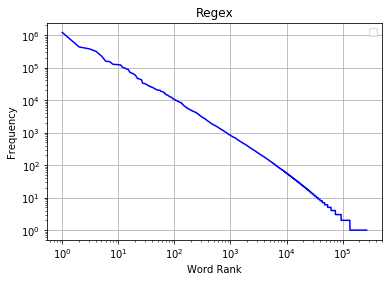

In [27]:
pre = preprocessing()
t=pre.tokenizer(type='RegexpTokenizer')
s1=pre.tokenize(sentence=alltext, tokenizer=t)
#fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
fig, ax = plt.subplots()
dic_data=c.Counter(s1)
ax.plot(
    range(1, len(dic_data.keys()) + 1),
    sorted(list(dic_data.values()), reverse=True),
    '-b'
)
ax.set(xlabel='Word Rank', ylabel='Frequency',title='Regex')
ax.legend()
#ax.set_ylim([0,1])
#ax.xaxis.set_ticks(np.arange(0, 20, 1))
ax.grid(True, zorder=5)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
fig.savefig("zipfs5.png")

In [10]:
dic_data.most_common(5)

[('.', 1200839), ('-', 429965), (':', 378057), (',', 314434), ('the', 227194)]

In [11]:
bigrm = list(nltk.bigrams(alltext.split()))

In [12]:
bigrams_all=[]
for a in bigrm:
    bigrams_all.append('{} {}'.format(a[0],a[1]))
    

In [14]:
len(bigrams_all)

6046668

In [15]:
dic_data=c.Counter(bigrams_all)
dic_data.most_common(5)

[('of the', 26198),
 ('in the', 17251),
 ('Subject: Re:', 13228),
 ('Apr 1993', 12423),
 ('to the', 10325)]

No handles with labels found to put in legend.
/home/gcaracas/repos/cozmo_venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


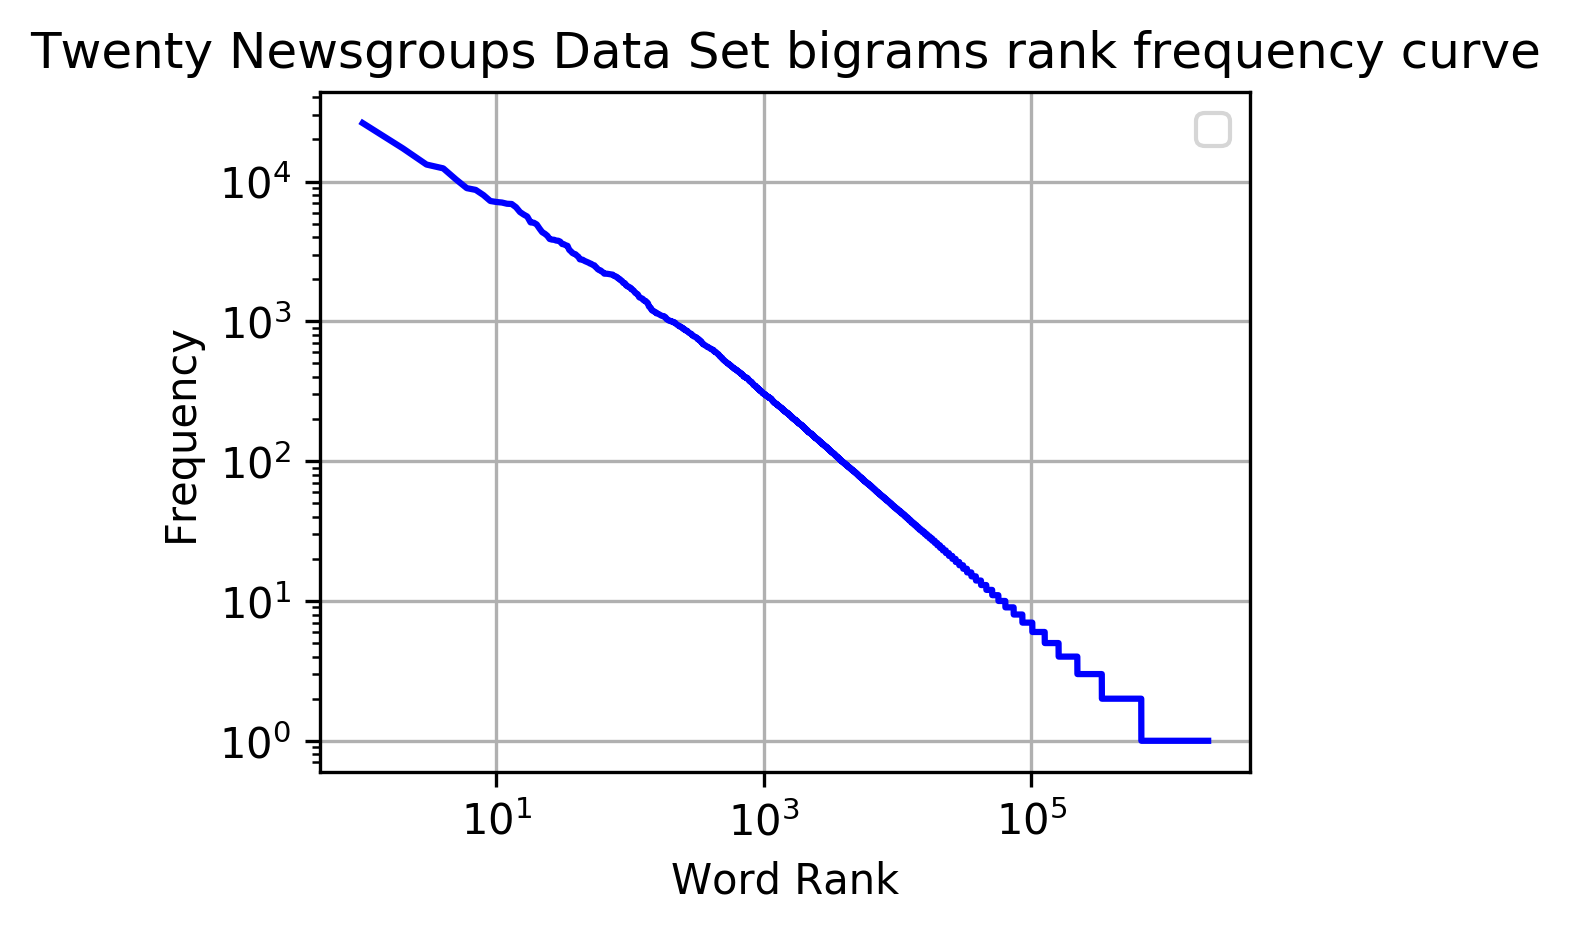

In [31]:
zipf_law_plot(text=bigrams_all,title='Twenty Newsgroups Data Set bigrams rank frequency curve')

Heap's law

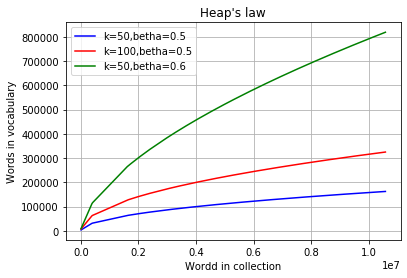

In [44]:
tokens=c.Counter(s1)
k=50
betha=0.5
n=0
words_total=[]
words_in_vocabulary=[]
for tokens, words in tokens.items():
    n=n+words
    v=k*(n**betha)
    words_in_vocabulary.append(v)
    words_total.append(n)
k=100
betha=0.5
n=0
words2_total=[]
words2_in_vocabulary=[]
tokens=c.Counter(s1)
for tokens, words in tokens.items():
    n=n+words
    v=k*(n**betha)
    words2_in_vocabulary.append(v)
    words2_total.append(n)
k=50
betha=0.6
n=0
words3_total=[]
words3_in_vocabulary=[]
tokens=c.Counter(s1)
for tokens, words in tokens.items():
    n=n+words
    v=k*(n**betha)
    words3_in_vocabulary.append(v)
    words3_total.append(n)

    
fig, ax = plt.subplots()
ax.plot(
    words_total,
    words_in_vocabulary,
    '-b',
    label='k=50,betha=0.5'
)
ax.plot(
    words2_total,
    words2_in_vocabulary,
    '-r',
    label='k=100,betha=0.5'
)
ax.plot(
    words3_total,
    words3_in_vocabulary,
    '-g',
    label='k=50,betha=0.6'
)
ax.set(xlabel='Wordd in collection', ylabel='Words in vocabulary',
title='Heap\'s law')
ax.legend()
#x.set_xscale("log", nonposx='clip')
#x.set_yscale("log", nonposy='clip')
ax.grid(True, zorder=5)

In [63]:
words_in_collection=[]
words_in_vocabulary=[]
collection={}
total_words=0
sampling=100
counter=0
for i in tqdm_notebook(range(len(s1)), desc='Processing'):
    counter=counter+1
    word=s1[i]
    total_words=total_words+1
    collection[word]=1
    if counter == sampling:
        words_in_collection.append(total_words)
        words_in_vocabulary.append(len(collection))
        counter=0

/home/gcaracas/repos/cozmo_venv/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


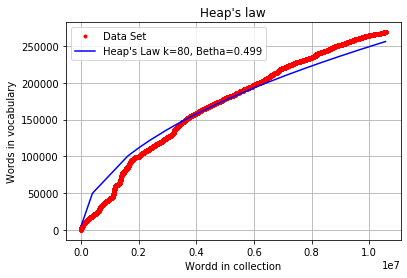

In [75]:
tokens=c.Counter(s1)
k=80
betha=0.499
n=0
words_total_pred=[]
words_in_vocabulary_pred=[]
for tokens, words in tokens.items():
    n=n+words
    v=k*(n**betha)
    words_in_vocabulary_pred.append(v)
    words_total_pred.append(n)
    
    
fig, ax = plt.subplots()
ax.plot(
    words_in_collection,
    words_in_vocabulary,
    '.r',
    label='Data Set'
)
ax.plot(
    words_total_pred,
    words_in_vocabulary_pred,
    '-b',
    label='Heap\'s Law k=80, Betha=0.499'
)
ax.set(xlabel='Word in collection', ylabel='Words in vocabulary',
title='Heap\'s law')
ax.legend()
ax.grid(True, zorder=5)
fig.savefig("hlaw.png")

In [84]:
pre = preprocessing()
t=pre.tokenizer(type='RegexpTokenizer')
sorted1=pre.tokenize(sentence=alltextsorted, tokenizer=t)


Preprocessing class


/home/gcaracas/repos/cozmo_venv/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


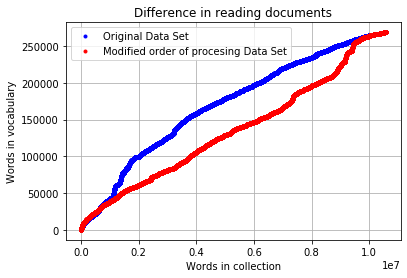

In [86]:
ss=pre.tokenize(sentence=alltextsorted, tokenizer=t)
tokens=c.Counter(ss)

words_in_collections=[]
words_in_vocabularys=[]
collection={}
total_words=0
sampling=100
counter=0
for i in tqdm_notebook(range(len(ss)), desc='Processing'):
    counter=counter+1
    word=ss[i]
    total_words=total_words+1
    collection[word]=1
    if counter == sampling:
        words_in_collections.append(total_words)
        words_in_vocabularys.append(len(collection))
        counter=0


fig, ax = plt.subplots()
ax.plot(
    words_in_collection,
    words_in_vocabulary,
    '.b',
    label='Original Data Set'
)
ax.plot(
    words_in_collections,
    words_in_vocabularys,
    '.r',
    label='Modified order of procesing Data Set'
)
ax.set(xlabel='Words in collection', ylabel='Words in vocabulary',
title='Difference in reading documents')
ax.legend()
ax.grid(True, zorder=5)
fig.savefig("hlaw2.png")